<a href="https://colab.research.google.com/github/bugatha1/Tensorflow/blob/main/Tensorflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [4]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
  tf.keras.layers.Dense(1, name='output_layer')                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params : total number of parameters in the model.<br>
Trainable params: these are the parameters (patterns) the model can update as it trains.<br>
Non-Trainalbe params : these are the parameters aren't updated during training (this is typically when you bring in already learn patterns or parameters from other models during **transfer learning** <br>


In [7]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 32.8595 - mae: 32.8595
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.8782 - mae: 31.8782
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 41.6251 - mae: 41.6251
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 32.1828 - mae: 32.1828
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 13.2389 - mae: 13.2389
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4098 - mae: 27.4098
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6577 - mae: 9.6577
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6815 - mae: 13.6815
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1820 - mae: 11.1820
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4267 - mae: 11.4267
Epoch 11/100
2/2 [==============================] - 0s 5ms/st

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


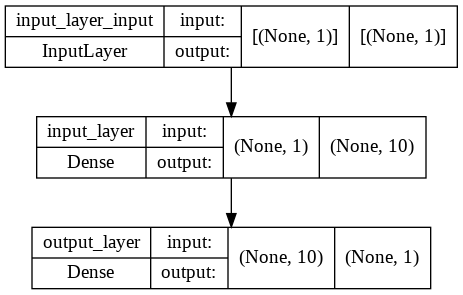

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [10]:
y_pred = model.predict(X_test)
y_pred

array([[39.273533],
       [41.80174 ],
       [44.329937],
       [46.858143],
       [49.386345],
       [51.91455 ],
       [54.44275 ],
       [56.970955],
       [59.499157],
       [62.02736 ]], dtype=float32)

In [11]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [12]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='r', label='training data')
  plt.scatter(test_data, test_labels, c='b', label='testing data')
  plt.scatter(test_data, predictions, c='g', label='predicton data')
  plt.legend();


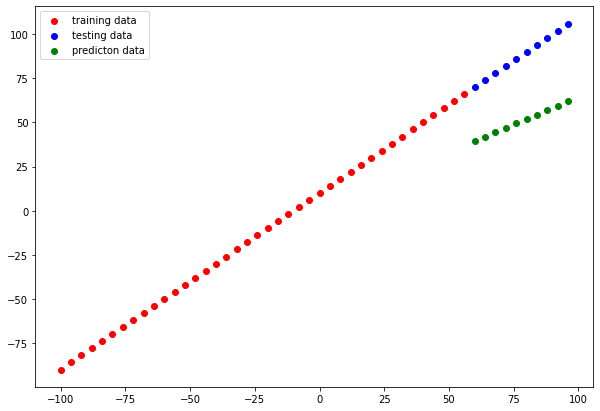

In [13]:
plot_predictions()

In [14]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 135ms/step - loss: 37.3496 - mae: 37.3496


[37.349552154541016, 37.349552154541016]

In [15]:
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([48.726467, 46.19826 , 43.670063, 41.141857, 38.613655, 36.08545 ,
       33.55725 , 31.029047, 28.500843, 25.972641], dtype=float32)>

In [16]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [17]:
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=37.349552>

In [18]:
tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1412.8602>

In [19]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [20]:
tf.random.set_seed = 42

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 87.9543 - mae: 87.9543
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 58.6816 - mae: 58.6816
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 26.1869 - mae: 26.1869
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8100 - mae: 10.8100
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.4422 - mae: 19.4422
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.7560 - mae: 7.7560
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6474 - mae: 9.6474
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6473 - mae: 10.6473
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1121 - mae: 8.1121
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 16.8460 - mae: 16.8460
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

In [21]:
y_preds1 = model.predict(X_test)
y_preds1

array([[ 70.023506],
       [ 74.604324],
       [ 79.18514 ],
       [ 83.76596 ],
       [ 88.34678 ],
       [ 92.9276  ],
       [ 97.50841 ],
       [102.089226],
       [106.670044],
       [111.25086 ]], dtype=float32)

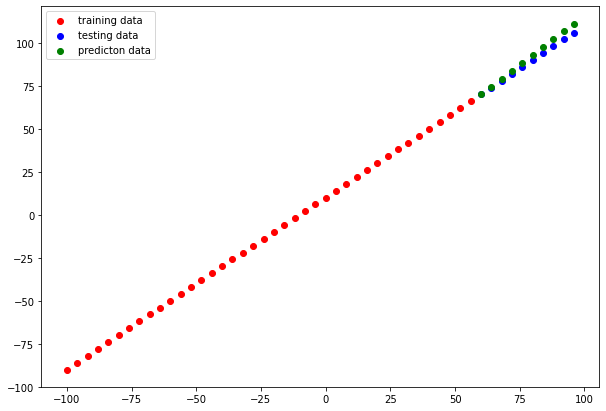

In [22]:
plot_predictions(predictions=y_preds1)

In [23]:
mae1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds1))
mse1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds1))
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.6371849>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.737869>)

In [24]:
tf.random.set_seed = 42

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 38.9682 - mse: 2202.1809
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 30.8436 - mse: 1320.3435
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5952 - mse: 84.3834
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.7050 - mse: 159.4163
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 25.2857 - mse: 927.9861
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.2126 - mse: 267.8026
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2536 - mse: 163.0137
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 18.4201 - mse: 456.3293
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7086 - mse: 152.3421
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 15.2863 - mse: 301.4631
Epoch 11/100
2/2 [==============================] 

In [25]:
y_pred2 = model.predict(X_test)
y_pred2

array([[36.45333 ],
       [38.78523 ],
       [41.117126],
       [43.449024],
       [45.780922],
       [48.11282 ],
       [50.444725],
       [52.77662 ],
       [55.108517],
       [57.440414]], dtype=float32)

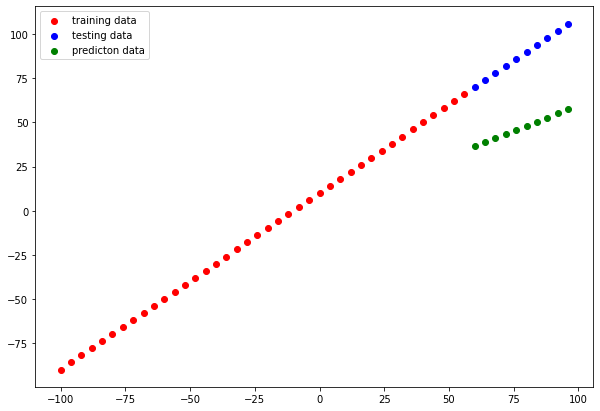

In [26]:
plot_predictions(predictions=y_pred2)

In [27]:
mae2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred2))
mse2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred2))
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=41.053123>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1708.3154>)

In [28]:
import pandas as pd

model_results = [["model1", mae1.numpy(), mse1.numpy()],
                 ['model2', mae2.numpy(), mse2.numpy()]
                 ]

model_metrics = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])   
model_metrics
             

,model,mae,mse
0,model1,2.637185,9.737869
1,model2,41.053123,1708.315430


**TensorBoard** - it is a tensorflow library to help track modeling experiments<br>
**Weights & Biases** - it is a tool for tracking all kinds of machine learing experiments and it's not specific to library

Model can save in below 2 formats
1. SavedModel format
2. HDF5 format <br>

The save file includes <br>
-> model architecture <br>
-> model weights <br>
-> state of optimizer, allowing to resume training exactly where you left off

In [29]:
model.save("best_model_savedmodel_format")

INFO:tensorflow:Assets written to: best_model_savedmodel_format/assets


In [30]:
model.save("best_model_HDF5_fromat.h5")

In [31]:
load_savedmodle_foramt = tf.keras.models.load_model("best_model_savedmodel_format")
load_savedmodle_foramt.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [34]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
insurance_onehot =  pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [36]:
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [37]:
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]

In [38]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [39]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
tf.random.set_seed = 42

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(10)                                       
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

In [42]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6415.5664 - mae: 6415.5664


[6415.56640625, 6415.56640625]

In [43]:
tf.random.set_seed = 42

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13280.9844 - mae: 13280.9844
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13114.8789 - mae: 13114.8789
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12765.4961 - mae: 12765.4961
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12089.3350 - mae: 12089.3350
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10958.6309 - mae: 10958.6309
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9517.2686 - mae: 9517.2686
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8194.3535 - mae: 8194.3535
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7535.8521 - mae: 7535.8521
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7421.5093 - mae: 7421.5093
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7403.9727 - mae:

In [44]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4992.4092 - mae: 4992.4092


[4992.4091796875, 4992.4091796875]

In [45]:
tf.random.set_seed = 42

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13323.7061 - mae: 13323.7061
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13233.5928 - mae: 13233.5928
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13016.2480 - mae: 13016.2480
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12530.7715 - mae: 12530.7715
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11615.8633 - mae: 11615.8633
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10248.1738 - mae: 10248.1738
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8756.5732 - mae: 8756.5732
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7724.5234 - mae: 7724.5234
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7446.3125 - mae: 7446.3125
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.2388 - ma

In [46]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3504.7190 - mae: 3504.7190


[3504.718994140625, 3504.718994140625]

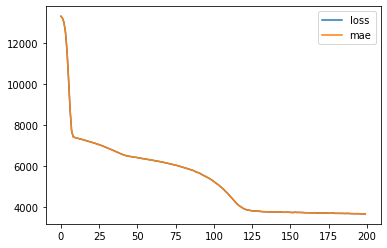

In [47]:
pd.DataFrame(history.history).plot()
plt.xlable = "epochs"
plt.ylabel = "loss"

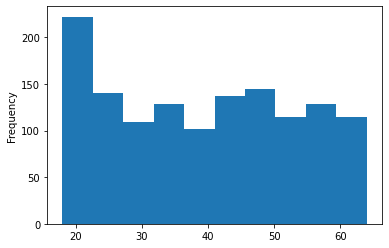

In [48]:
X["age"].plot(kind='hist')

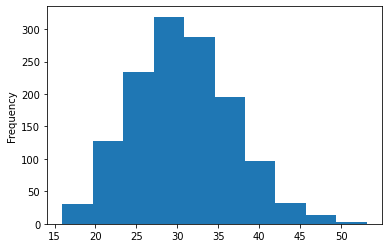

In [49]:
X["bmi"].plot(kind='hist')

In [50]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64